# Dask Array in 3 minutes

// From https://www.youtube.com/watch?v=9h_61hXCDuI)

In [11]:
def print_obj(obj, tag=None):
    """
    Print an object in terms of type and then display is.
    """
    if tag:
        print(tag)
    print("type=", type(obj))
    display(obj)
    

def print_dask(obj, visualize_graph=True, compute=True):
    """
    Print information about a dask task graph.
    """
    print("type=", type(obj))
    print("obj=", obj)
    #
    print("# display")
    display(obj)
    #
    print("# dask")
    display(obj.dask)
    #
    if visualize_graph:
        print("# visualize")
        display(obj.visualize())
    #
    if compute:
        print("# compute")
        res = obj.compute()
        print(type(res))
        print(res)

In [12]:
# https://stackoverflow.com/questions/59070260/dask-client-detect-local-default-cluster-already-running
import os
os.environ['DASK_SCHEDULER_ADDRESS'] = 'tcp://localhost:8787'

if not ("cluster" in globals() and "client" in globals()):
    from dask.distributed import Client, LocalCluster
    cluster = LocalCluster(dashboard_address=':8787')
    client = Client(cluster)
    print(client, client.dashboard_link)

## Small array

In [13]:
import numpy as np

x = np.ones(15)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
import dask.array as da

x = da.ones(15, chunks=(5, ))
x

dask.array<ones_like, shape=(15,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [15]:
# The return type is a scalar.
x.sum()

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [16]:
# Dask is lazy by default.
x.sum().compute()

15.0

## Medium array

type= <class 'dask.array.core.Array'>
obj= dask.array<ones_like, shape=(10000, 10000), dtype=float64, chunksize=(5000, 5000), chunktype=numpy.ndarray>
# display


dask.array<ones_like, shape=(10000, 10000), dtype=float64, chunksize=(5000, 5000), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 1 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f528b79cac0>
 0. ones_like-286b0ef439f9a3f83ce2bfbdceafa189

# visualize


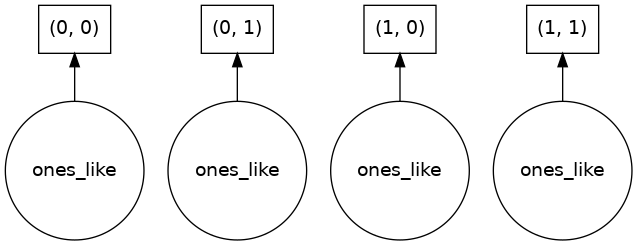

# compute
<class 'numpy.ndarray'>
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [17]:
x = da.ones((10_000, 10_000), chunks=(5000, 5000))
print_dask(x)

type= <class 'dask.array.core.Array'>
obj= dask.array<add, shape=(10000, 10000), dtype=float64, chunksize=(5000, 5000), chunktype=numpy.ndarray>
# display


dask.array<add, shape=(10000, 10000), dtype=float64, chunksize=(5000, 5000), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f528b79db70>
 0. ones_like-286b0ef439f9a3f83ce2bfbdceafa189
 1. transpose-7d27c86ba63e27391baeb70403692915
 2. add-3a6cec2e427b179d02cd0f48940f9555

# visualize


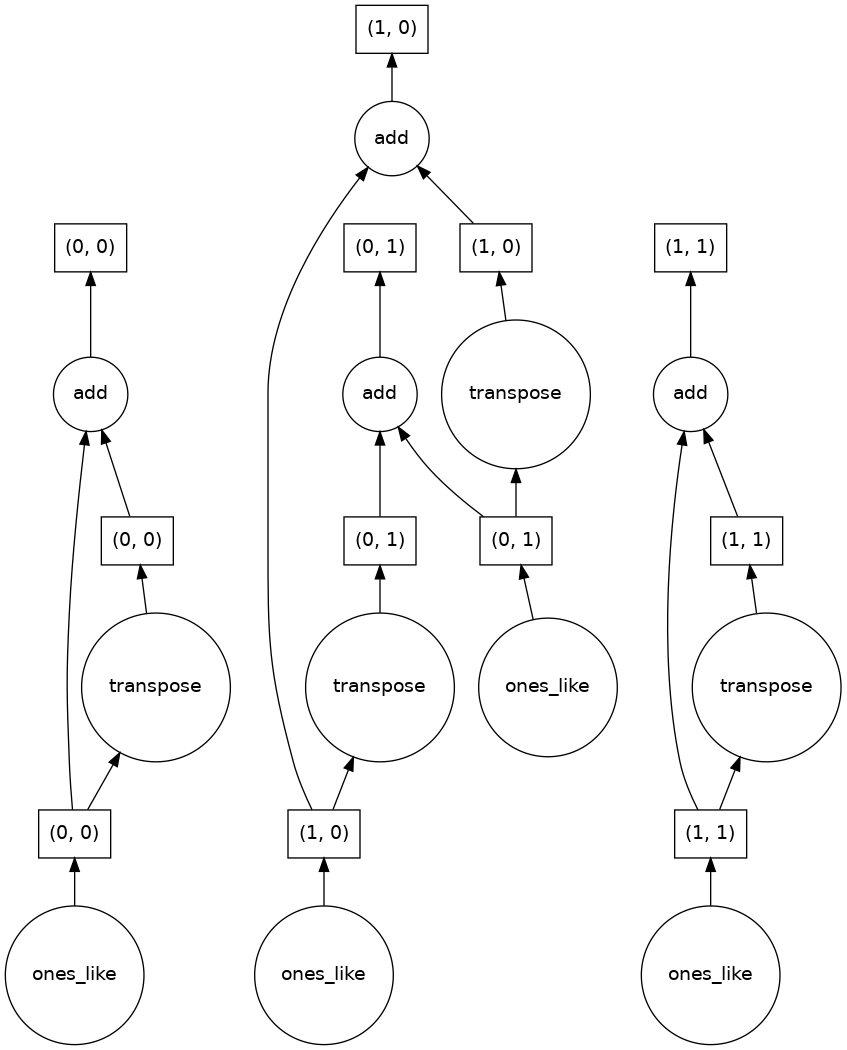

# compute
<class 'numpy.ndarray'>
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


In [18]:
y = x + x.T

print_dask(y)

In [19]:
y.compute()

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]])

## Larger array

In [20]:
x = da.ones((10_000, 10_000), chunks=(1000, 1000))
x

dask.array<ones_like, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

type= <class 'dask.array.core.Array'>
obj= dask.array<add, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>
# display


dask.array<add, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f528b64e320>
 0. ones_like-408dd8caf5927f7c3d99ab17eb2d2441
 1. transpose-b93471ef7289bf9830db3d0d5cfc1447
 2. add-f8801a4874fbcc98fc03ca6ca7936537

# visualize


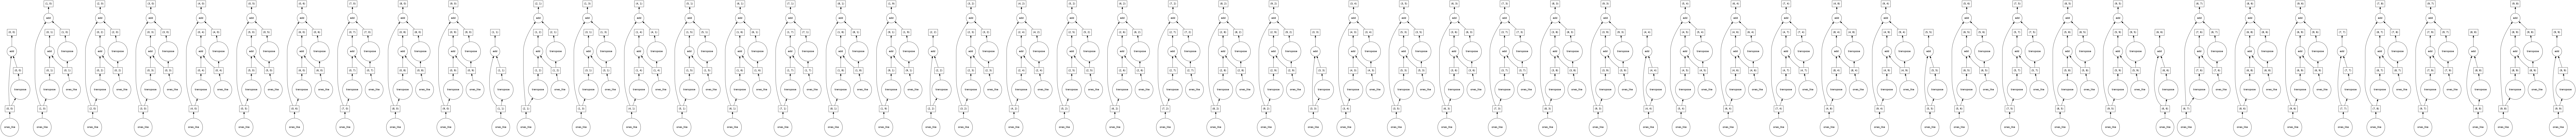

# compute
<class 'numpy.ndarray'>
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


In [21]:
y = x + x.T
print_dask(y)

In [22]:
y.compute()

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]])

# Dask DataFrame: An introduction

// https://www.youtube.com/watch?v=AT2XtFehFSQ&t=37s

In [23]:
import dask
import dask.dataframe as dd

# Get an example large dataset.
df_orig = dask.datasets.timeseries()
print_obj(df_orig)

# It has 30 partitions.

type= <class 'dask.dataframe.core.DataFrame'>


,name,id,x,y
npartitions=30,,,,
2000-01-01,object,int64,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [24]:
# Save to disk in chunks.
df_orig.to_csv("data")
!ls -lh data

total 176M
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 00.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 01.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 02.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 03.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 04.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 05.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 06.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 07.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 08.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 09.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 10.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 11.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 12.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 13.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 14.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 15.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 16.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 17.part
-rw-r--r-- 1 root root 5.9M Apr  6 20:42 18.part
-rw-r--r-- 1 root root 5.8M Apr  6 20:42 19.part
-rw-r--r-

In [25]:
# Load one chunk.
import pandas as pd
df = pd.read_csv("data/00.part", parse_dates=["timestamp"])
df

,timestamp,name,id,x,y
0,2000-01-01 00:00:00,Ray,1026,0.917465,0.451444
1,2000-01-01 00:00:01,Charlie,987,0.019168,0.481458
2,2000-01-01 00:00:02,Bob,994,-0.795839,0.914843
3,2000-01-01 00:00:03,Oliver,974,0.832728,-0.663150
4,2000-01-01 00:00:04,George,976,0.080027,-0.262107
...,...,...,...,...,...
86395,2000-01-01 23:59:55,Victor,1008,-0.412689,-0.366519
86396,2000-01-01 23:59:56,Tim,966,-0.823744,0.712636
86397,2000-01-01 23:59:57,Sarah,1009,-0.850609,-0.822107
86398,2000-01-01 23:59:58,Zelda,1046,0.566341,0.816251


In [26]:
df.x.mean()

0.0006411407257602942

In [27]:
df.groupby("name").x.std()

name
Alice       0.575509
Bob         0.573823
Charlie     0.578024
Dan         0.571394
Edith       0.576030
Frank       0.572761
George      0.566578
Hannah      0.581152
Ingrid      0.573406
Jerry       0.581904
Kevin       0.574399
Laura       0.582828
Michael     0.579548
Norbert     0.572477
Oliver      0.577507
Patricia    0.574525
Quinn       0.578594
Ray         0.581503
Sarah       0.578297
Tim         0.586799
Ursula      0.575453
Victor      0.581946
Wendy       0.577952
Xavier      0.573557
Yvonne      0.585677
Zelda       0.578599
Name: x, dtype: float64

In [28]:
import dask.dataframe as dd

# Read one partition with Dask.
#df = dd.read_csv("data/00.part", parse_dates=["timestamp"])

# Read all partitions with Dask.
df = dd.read_csv("data/*.part", parse_dates=["timestamp"])

print_obj(df)

# head() materializes the data.
df.head()

type= <class 'dask.dataframe.core.DataFrame'>


,timestamp,name,id,x,y
npartitions=30,,,,,
,datetime64[ns],object,int64,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


,timestamp,name,id,x,y
0,2000-01-01 00:00:00,Ray,1026,0.917465,0.451444
1,2000-01-01 00:00:01,Charlie,987,0.019168,0.481458
2,2000-01-01 00:00:02,Bob,994,-0.795839,0.914843
3,2000-01-01 00:00:03,Oliver,974,0.832728,-0.663150
4,2000-01-01 00:00:04,George,976,0.080027,-0.262107


In [29]:
# We get a "lazy result". Dask reads from disk only when one asks for a result.
obj = df.x.mean()

print_obj(obj)

type= <class 'dask.dataframe.core.Scalar'>


dd.Scalar<series-..., dtype=float64>

type= <class 'dask.dataframe.core.Scalar'>
obj= dd.Scalar<series-..., dtype=float64>
# display


dd.Scalar<series-..., dtype=float64>

# dask


HighLevelGraph with 7 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f528925c790>
 0. read-csv-4216ce9d09cc23789fd57b7993ad617b
 1. getitem-ff4c79f16d9229f71a8ae07f3a649d55
 2. series-count-chunk-c84a8b241ff0e203d8eeaa80e4a110f5-f8c6885ae8952a9b40ef8ff0753fdb4d
 3. series-count-agg-c84a8b241ff0e203d8eeaa80e4a110f5
 4. series-sum-chunk-f71b41852794847baa9e3a8e26305500-2253a7da0634f45bfca2b192e1c921f5
 5. series-sum-agg-f71b41852794847baa9e3a8e26305500
 6. series-mean-b5e5584c1d4630023d6bc2cda63b5d97-06b51a1f151d4f0d6f6f1f9ac4f4d038

# visualize


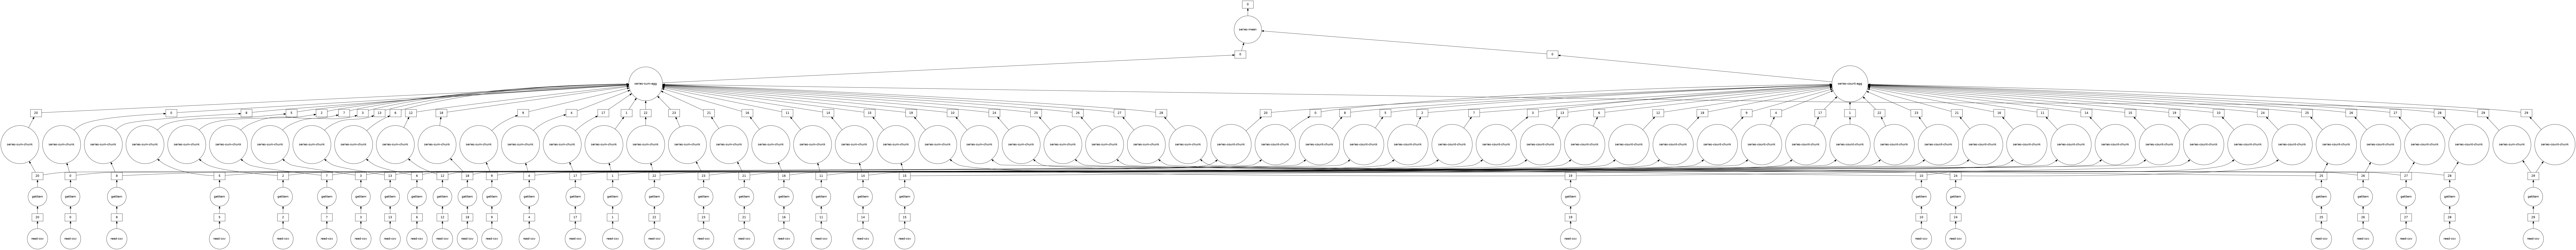

In [30]:
print_dask(obj, compute=False)

In [31]:
df.x.mean().compute()

0.00010914505884446845

In [32]:
obj = df.groupby("name").x.std()

obj.compute()

name
Alice       0.576795
Bob         0.576486
Charlie     0.577941
Dan         0.576145
Edith       0.576822
Frank       0.577281
George      0.576158
Hannah      0.578663
Ingrid      0.576998
Jerry       0.576230
Kevin       0.577132
Laura       0.577517
Michael     0.576537
Norbert     0.577854
Oliver      0.576422
Patricia    0.577839
Quinn       0.576708
Ray         0.577373
Sarah       0.578253
Tim         0.577886
Ursula      0.576609
Victor      0.578285
Wendy       0.577939
Xavier      0.577483
Yvonne      0.579180
Zelda       0.578322
Name: x, dtype: float64

## Index, partitions, and sorting

In [33]:
# The original data read is made of 30 partitions.
# Each partition can be read in parallel and independently.
df

,timestamp,name,id,x,y
npartitions=30,,,,,
,datetime64[ns],object,int64,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [34]:
df.partitions[5]

,timestamp,name,id,x,y
npartitions=1,,,,,
,datetime64[ns],object,int64,float64,float64
,...,...,...,...,...


In [35]:
obj = df.partitions[5].compute()

print_obj(obj)

type= <class 'pandas.core.frame.DataFrame'>


,timestamp,name,id,x,y
0,2000-01-06 00:00:00,Norbert,966,-0.803593,0.612999
1,2000-01-06 00:00:01,Ingrid,990,-0.019120,-0.116531
2,2000-01-06 00:00:02,Patricia,1045,0.016982,0.898255
3,2000-01-06 00:00:03,Jerry,968,0.868064,-0.288787
4,2000-01-06 00:00:04,Sarah,1006,-0.308867,-0.673545
...,...,...,...,...,...
86395,2000-01-06 23:59:55,Charlie,1017,0.297838,0.636887
86396,2000-01-06 23:59:56,Ingrid,1058,0.808009,0.152501
86397,2000-01-06 23:59:57,Ray,1070,-0.780764,0.208297
86398,2000-01-06 23:59:58,Victor,1054,0.482902,-0.603251


In [36]:
# Apply a function across all the partitions.
#df.map_partitions(type).compute()
df.map_partitions(len).compute()

0     86400
1     86400
2     86400
3     86400
4     86400
5     86400
6     86400
7     86400
8     86400
9     86400
10    86400
11    86400
12    86400
13    86400
14    86400
15    86400
16    86400
17    86400
18    86400
19    86400
20    86400
21    86400
22    86400
23    86400
24    86400
25    86400
26    86400
27    86400
28    86400
29    86400
dtype: int64

In [37]:
# Read the first partition.
df.head()

,timestamp,name,id,x,y
0,2000-01-01 00:00:00,Ray,1026,0.917465,0.451444
1,2000-01-01 00:00:01,Charlie,987,0.019168,0.481458
2,2000-01-01 00:00:02,Bob,994,-0.795839,0.914843
3,2000-01-01 00:00:03,Oliver,974,0.832728,-0.663150
4,2000-01-01 00:00:04,George,976,0.080027,-0.262107


In [38]:
# Read the last partition.
df.tail()

,timestamp,name,id,x,y
86395,2000-01-30 23:59:55,Frank,999,0.888196,0.122662
86396,2000-01-30 23:59:56,Zelda,973,0.609850,0.205817
86397,2000-01-30 23:59:57,Sarah,959,-0.862086,-0.082881
86398,2000-01-30 23:59:58,Dan,1053,0.992494,-0.454917
86399,2000-01-30 23:59:59,Edith,989,-0.597347,0.111783


In [39]:
# This forces Dask to read the data but it doesn't compute.
df = df.set_index("timestamp")
print_obj(df)

# The partitions host data between two different timestamps.
# In this way Dask knows in which file chunks of data.

type= <class 'dask.dataframe.core.DataFrame'>


,name,id,x,y
npartitions=30,,,,
2000-01-01 00:00:00,object,int64,float64,float64
2000-01-02 00:00:00,...,...,...,...
...,...,...,...,...
2000-01-30 00:00:00,...,...,...,...
2000-01-30 23:59:59,...,...,...,...


In [40]:
# Save files to Parquet.
df.to_parquet("myfile.parquet")

In [41]:
!ls myfile.parquet

part.0.parquet	 part.16.parquet  part.23.parquet  part.4.parquet
part.1.parquet	 part.17.parquet  part.24.parquet  part.5.parquet
part.10.parquet  part.18.parquet  part.25.parquet  part.6.parquet
part.11.parquet  part.19.parquet  part.26.parquet  part.7.parquet
part.12.parquet  part.2.parquet   part.27.parquet  part.8.parquet
part.13.parquet  part.20.parquet  part.28.parquet  part.9.parquet
part.14.parquet  part.21.parquet  part.29.parquet
part.15.parquet  part.22.parquet  part.3.parquet


# Dask Bag

From https://www.youtube.com/watch?v=-qIiJ1XtSv0

In [42]:
import dask.bag as db

# Create a bag storing 10 elements.
b = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=4)
print_obj(b)

type= <class 'dask.bag.core.Bag'>


dask.bag<from_sequence, npartitions=4>

In [43]:
# This produces a new bag.
obj = b.map(lambda x: x ** 2)

print_obj(b)

type= <class 'dask.bag.core.Bag'>


dask.bag<from_sequence, npartitions=4>

In [44]:
# Execute.
obj.compute()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [45]:
# One can chain computations: e.g., filter, square and sum.
obj = b.filter(lambda x : x % 2 == 0).map(lambda x: x ** 2).sum()
print_obj(obj)

type= <class 'dask.bag.core.Item'>


type= <class 'dask.bag.core.Item'>
obj= <dask.bag.core.Item object at 0x7f52d6d95ed0>
# display


# dask


HighLevelGraph with 4 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f52d6d97160>
 0. from_sequence-b6740b62d9f7e91485052e5b55f8905d
 1. filter-lambda-a798bd9ff270321ddc1b88b5796ba3bf
 2. lambda-1541c5bbe8e2fc18d1ecfcdfefe757a8
 3. sum-aggregate-249aed93464100dfd5d96bef692a504b

# visualize


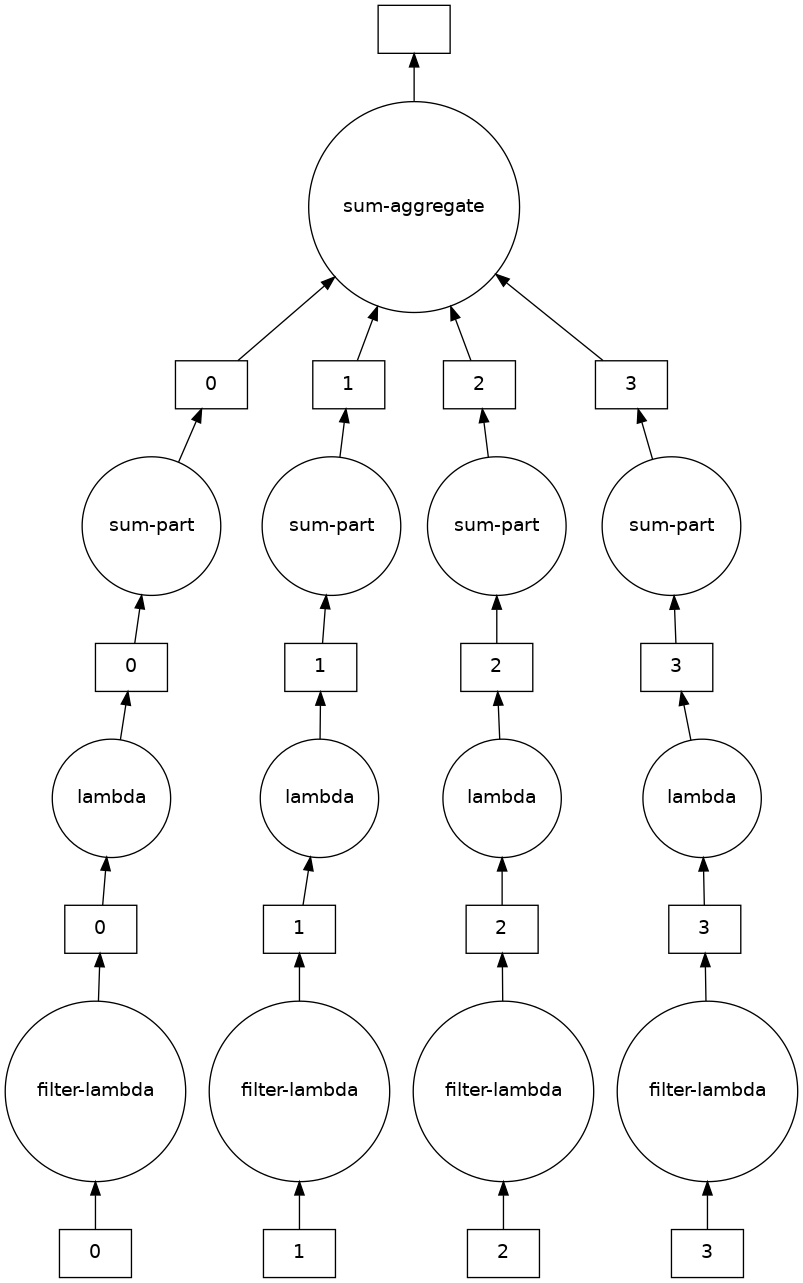

# compute
<class 'int'>
220


In [46]:
print_dask(obj)

In [47]:
obj.compute()

220

## An example with JSON data

In [48]:
#!wget https://archive.analytics.mybinder.org/events-2019-06-17.jsonl

In [49]:
!pip install aiohttp requests

In [50]:
import os
import requests

#os.system("rm -rf data_json")
os.system("mkdir data_json")

for month in range(6, 7):
    for day in range(1, 30):
        file = "events-2019-%02d-%02d.jsonl" % (month, day)
        dst_file = f'data_json/{file}'
        print(dst_file)
        if os.path.exists(dst_file):
            continue
        url = "https://archive.analytics.mybinder.org/%s" % file
        print(url)
        r = requests.get(url, allow_redirects=True)
        open(dst_file, 'wb').write(r.content)


data_json/events-2019-06-01.jsonl
data_json/events-2019-06-02.jsonl
data_json/events-2019-06-03.jsonl
data_json/events-2019-06-04.jsonl
data_json/events-2019-06-05.jsonl
data_json/events-2019-06-06.jsonl
data_json/events-2019-06-07.jsonl
data_json/events-2019-06-08.jsonl
data_json/events-2019-06-09.jsonl
data_json/events-2019-06-10.jsonl
data_json/events-2019-06-11.jsonl
data_json/events-2019-06-12.jsonl
data_json/events-2019-06-13.jsonl
data_json/events-2019-06-14.jsonl
data_json/events-2019-06-15.jsonl
data_json/events-2019-06-16.jsonl
data_json/events-2019-06-17.jsonl
data_json/events-2019-06-18.jsonl
data_json/events-2019-06-19.jsonl
data_json/events-2019-06-20.jsonl
data_json/events-2019-06-21.jsonl
data_json/events-2019-06-22.jsonl
data_json/events-2019-06-23.jsonl
data_json/events-2019-06-24.jsonl
data_json/events-2019-06-25.jsonl
data_json/events-2019-06-26.jsonl
data_json/events-2019-06-27.jsonl
data_json/events-2019-06-28.jsonl
data_json/events-2019-06-29.jsonl


mkdir: cannot create directory ‘data_json’: File exists


In [51]:
!ls data_json/*
!du -h data_json

data_json/events-2019-06-01.jsonl  data_json/events-2019-06-16.jsonl
data_json/events-2019-06-02.jsonl  data_json/events-2019-06-17.jsonl
data_json/events-2019-06-03.jsonl  data_json/events-2019-06-18.jsonl
data_json/events-2019-06-04.jsonl  data_json/events-2019-06-19.jsonl
data_json/events-2019-06-05.jsonl  data_json/events-2019-06-20.jsonl
data_json/events-2019-06-06.jsonl  data_json/events-2019-06-21.jsonl
data_json/events-2019-06-07.jsonl  data_json/events-2019-06-22.jsonl
data_json/events-2019-06-08.jsonl  data_json/events-2019-06-23.jsonl
data_json/events-2019-06-09.jsonl  data_json/events-2019-06-24.jsonl
data_json/events-2019-06-10.jsonl  data_json/events-2019-06-25.jsonl
data_json/events-2019-06-11.jsonl  data_json/events-2019-06-26.jsonl
data_json/events-2019-06-12.jsonl  data_json/events-2019-06-27.jsonl
data_json/events-2019-06-13.jsonl  data_json/events-2019-06-28.jsonl
data_json/events-2019-06-14.jsonl  data_json/events-2019-06-29.jsonl
data_json/events-2019-06-15.jsonl


In [52]:
!head data_json/events-2019-06-14.jsonl

!du -h data_json/events-2019-06-14.jsonl

{"timestamp": "2019-06-14T00:00:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 3, "provider": "GitHub", "spec": "QuantStack/xeus-cling/stable", "status": "success", "origin": "gke.mybinder.org"}
{"timestamp": "2019-06-14T00:00:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 3, "provider": "GitHub", "spec": "TheZetner/jupyter-examples-2019/master", "status": "success", "origin": "gke.mybinder.org"}
{"timestamp": "2019-06-14T00:00:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 3, "provider": "GitHub", "spec": "binder-examples/r/master", "status": "success", "origin": "gke.mybinder.org"}
{"timestamp": "2019-06-14T00:00:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 3, "provider": "GitHub", "spec": "binder-examples/r/master", "status": "success", "origin": "gke.mybinder.org"}
{"timestamp": "2019-06-14T00:00:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 3, "provider": "GitHub", "spec": "DS-100/textbook/mast

In [53]:
import dask.bag as db

# Read a single file.
#lines = db.read_text("data_json/events-2019-06-14.jsonl")

# Read all files.
lines = db.read_text("data_json/events-*.jsonl")

# Read the first 2 lines.
lines.take(2)

('{"timestamp": "2019-06-01T00:00:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provider": "GitHub", "spec": "sbl-sdsc/mmtf-workshop-2018/master", "status": "success"}\n',
 '{"timestamp": "2019-06-01T00:01:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provider": "GitHub", "spec": "DS-100/textbook/master", "status": "success"}\n')

In [54]:
# It has a certain number of partitions, one per original file.
lines

dask.bag<bag-from-delayed, npartitions=29>

In [55]:
# Transform the JSON lines into structured data.
import json

records = lines.map(json.loads)
records.take(2)

({'timestamp': '2019-06-01T00:00:00+00:00',
  'schema': 'binderhub.jupyter.org/launch',
  'version': 2,
  'provider': 'GitHub',
  'spec': 'sbl-sdsc/mmtf-workshop-2018/master',
  'status': 'success'},
 {'timestamp': '2019-06-01T00:01:00+00:00',
  'schema': 'binderhub.jupyter.org/launch',
  'version': 2,
  'provider': 'GitHub',
  'spec': 'DS-100/textbook/master',
  'status': 'success'})

In [56]:
# Do a frequency count to find binders that run the most often.
records.map(lambda d: d["spec"]).frequencies(sort=True).compute()

[('ipython/ipython-in-depth/master', 163735),
 ('jupyterlab/jupyterlab-demo/master', 33724),
 ('ines/spacy-io-binder/live', 16367),
 ('DS-100/textbook/master', 11167),
 ('bokeh/bokeh-notebooks/master', 7834),
 ('ines/spacy-course/binder', 4778),
 ('binder-examples/requirements/master', 4754),
 ('rationalmatter/juno-demo-notebooks/master', 4553),
 ('binder-examples/r/master', 4547),
 ('QuantStack/xeus-cling/stable', 3602),
 ('numba/numba-examples/master', 2179),
 ('binder-examples/julia-python/master', 1988),
 ('dask/dask-examples/master', 1852),
 ('noamross/gams-in-r-course/master', 1850),
 ('ELC/8fdc0f490b3058872a7014f01416dfb6/master', 1697),
 ('ComputoCienciasUniandes/FISI2028-201910/master', 1230),
 ('wshuyi/demo-spacy-text-processing/master', 1224),
 ('data-8/textbook/gh-pages', 1223),
 ('jmsevillam/Calculadoras/master', 1220),
 ('jupyter/jupyter-book/gh-pages', 1009),
 ('freechipsproject/chisel-bootcamp/master', 964),
 ('rasahq/docs-binder/master', 937),
 ('ELC/380e584b87227b1572

In [57]:
# Look for records that have "dask" in the specs.
obj = records.filter(lambda d: "dask" in d["spec"])

# Convert to strings and saves.
obj = obj.map(json.dumps).to_textfiles("data/analysis/*.json")

In [58]:
!ls -l data/analysis

total 440
-rw-r--r-- 1 root root  8233 Apr  6 20:43 00.json
-rw-r--r-- 1 root root  6815 Apr  6 20:43 01.json
-rw-r--r-- 1 root root  6801 Apr  6 20:43 02.json
-rw-r--r-- 1 root root 10753 Apr  6 20:43 03.json
-rw-r--r-- 1 root root 12211 Apr  6 20:43 04.json
-rw-r--r-- 1 root root 14101 Apr  6 20:43 05.json
-rw-r--r-- 1 root root 12530 Apr  6 20:43 06.json
-rw-r--r-- 1 root root  5071 Apr  6 20:43 07.json
-rw-r--r-- 1 root root  6622 Apr  6 20:43 08.json
-rw-r--r-- 1 root root 12887 Apr  6 20:43 09.json
-rw-r--r-- 1 root root 20549 Apr  6 20:43 10.json
-rw-r--r-- 1 root root 21964 Apr  6 20:43 11.json
-rw-r--r-- 1 root root 15047 Apr  6 20:43 12.json
-rw-r--r-- 1 root root 23266 Apr  6 20:43 13.json
-rw-r--r-- 1 root root  9631 Apr  6 20:43 14.json
-rw-r--r-- 1 root root 10921 Apr  6 20:43 15.json
-rw-r--r-- 1 root root 18209 Apr  6 20:43 16.json
-rw-r--r-- 1 root root 21744 Apr  6 20:43 17.json
-rw-r--r-- 1 root root 18538 Apr  6 20:43 18.json
-rw-r--r-- 1 root root 22178 Apr  6 20:4

In [59]:
!head -20 data/analysis/00.json

{"timestamp": "2019-06-01T00:11:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provider": "GitHub", "spec": "dask/dask-examples/master", "status": "success"}
{"timestamp": "2019-06-01T01:09:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provider": "GitHub", "spec": "dask/dask-examples/master", "status": "success"}
{"timestamp": "2019-06-01T03:37:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provider": "GitHub", "spec": "dask/dask-examples/master", "status": "success"}
{"timestamp": "2019-06-01T04:17:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provider": "GitHub", "spec": "dask/dask-examples/master", "status": "success"}
{"timestamp": "2019-06-01T05:03:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provider": "GitHub", "spec": "dask/dask-examples/master", "status": "success"}
{"timestamp": "2019-06-01T05:28:00+00:00", "schema": "binderhub.jupyter.org/launch", "version": 2, "provi

In [60]:
# Instead of using Bag, one can use DataFrame.

df = records.to_dataframe()
print_obj(df)

# It still a lazy result.

type= <class 'dask.dataframe.core.DataFrame'>


,timestamp,schema,version,provider,spec,status
npartitions=29,,,,,,
,object,object,int64,object,object,object
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [61]:
df.spec.value_counts().nlargest(20).to_frame().compute()

,spec
ipython/ipython-in-depth/master,163735
jupyterlab/jupyterlab-demo/master,33724
ines/spacy-io-binder/live,16367
DS-100/textbook/master,11167
bokeh/bokeh-notebooks/master,7834
ines/spacy-course/binder,4778
binder-examples/requirements/master,4754
rationalmatter/juno-demo-notebooks/master,4553
binder-examples/r/master,4547
QuantStack/xeus-cling/stable,3602


# Dask Futures in 11 minutes

https://www.youtube.com/watch?v=07EiCpdhtDE

In [62]:
import time

def inc(x):
    """
    Take some time to compute and do a small computation.
    """
    time.sleep(1)
    return x + 1

In [63]:
%%time
inputs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []

for x in inputs:
    result = inc(x)
    results.append(result)
    
    
# This should take 10 secs since everything is executed serially.

CPU times: user 500 ms, sys: 63.1 ms, total: 563 ms
Wall time: 10 s


## concurrent.futures

In [64]:
# Dask Futures has the same interface as concurrent.futures.
#if True:
if False:
    from concurrent.futures import ThreadPoolExecutor

    e = ThreadPoolExecutor(4)
else:
    from concurrent.futures import ProcessPoolExecutor

    e = ProcessPoolExecutor(4)
    
# Threads and processes have the same interface but different performance characteristics.
e

In [65]:
%%time

future = e.submit(inc, 10)
future

# Submit is instantaneous, but you can see that the future is still running.

CPU times: user 115 µs, sys: 142 ms, total: 142 ms
Wall time: 139 ms


<Future at 0x7f52d721f970 state=running>

In [66]:
# After a bit of time, the task is done.
print(future)
print(future.result())

<Future at 0x7f52d721f970 state=running>
11


In [67]:
%%time

# Run the workload above in parallel.

inputs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
futures = []

for x in inputs:
    future = e.submit(inc, x)
    futures.append(future)
    
results = [future.result() for future in futures]
print(results)

# With 4 threads and 10 pieces of workload, it takes at least 3 batches (i.e., 3 secs).

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
CPU times: user 166 ms, sys: 11.1 ms, total: 177 ms
Wall time: 3.01 s


## Dask Futures

In [68]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 31.01 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42551,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: 1 day ago,Total memory: 31.01 GiB
Comm: tcp://127.0.0.1:44641,Total threads: 2
Dashboard: http://127.0.0.1:39021/status,Memory: 7.75 GiB
Nanny: tcp://127.0.0.1:42441,


In [69]:
%%time

futures = []

for x in inputs:
    # Dask Client has the same interface as futures.concurrent and can be used as an Executor.
    future = client.submit(inc, x)
    futures.append(future)
    
results = [future.result() for future in futures]
print(results)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
CPU times: user 283 ms, sys: 65.5 ms, total: 349 ms
Wall time: 2.06 s


## Executing work remotely

In [70]:
import numpy as np

# This creates an array on a remote worker.
future = client.submit(np.arange, 100)
future

<Future: pending, key: arange-50f43b0622896843e91df760b1af4cbd>

In [71]:
# When the future is finished, the data is not moved back to the client.
future

<Future: finished, type: numpy.ndarray, key: arange-50f43b0622896843e91df760b1af4cbd>

In [72]:
client.submit(np.sum, [1, 2, 3]).result()

6

In [73]:
# We can call np.sum on the remote array and bring back only the result.
client.submit(np.sum, future).result()

4950

In [74]:
## 
import time
import numpy as np


def load(x):
    """
    Get a sizable array.
    """
    time.sleep(0.2)
    return np.arange(1_000_000) + x


def process(x):
    time.sleep(0.1)
    return x + 1
    
    
def save(x):
    time.sleep(0.4)

In [75]:
%%time

inputs = range(50)

for i in inputs:
    x = load(i)
    y = process(x)
    save(y)
    
# It takes (0.2 + 0.1 + 0.4) * 50 = 0.7 * 50 = 35s

CPU times: user 1.94 s, sys: 250 ms, total: 2.19 s
Wall time: 35.2 s


In [76]:
%%time

inputs = range(50)

futures = []
for i in inputs:
    x = client.submit(load, i)
    y = client.submit(process, x)
    z = client.submit(save, y)
    futures.append(z)
    
result = [future.result() for future in futures]

CPU times: user 68.2 ms, sys: 20.1 ms, total: 88.3 ms
Wall time: 122 ms


In [77]:
## The same code can be written in a similar way as in the following.

L = [client.submit(load, i) for i in range(200)]
# The following line is equivalent to:
# L2 = [client.submit(process, x) for x in futures]
L2 = client.map(process, L)
L3 = client.map(save, L2)

# The problem is that the memory increases since we keep the futures are kept around
# and thus Dask can't allocate the memory.

In [78]:
# In fact
L[:5]

[<Future: finished, type: numpy.ndarray, key: load-02dfa3806646269540172b30ab88da0b>,
 <Future: finished, type: numpy.ndarray, key: load-61c8105fbf5d0bcf7660f08fed5a1a0e>,
 <Future: finished, type: numpy.ndarray, key: load-eefd36beb4fead6b7c6b6fa590d67664>,
 <Future: finished, type: numpy.ndarray, key: load-4e9efaa2b1f7cbc6314662bcd58542aa>,
 <Future: finished, type: numpy.ndarray, key: load-c184a42da65de61e678128afad666348>]

In [79]:
L[3].result()

array([      3,       4,       5, ..., 1000000, 1000001, 1000002])

In [80]:
# If you delete the futures, Dask can remove them.
del L
del L2